<a href="https://colab.research.google.com/github/Tushar-Bhardwaj33/Harkirat-Singh-course_code_and_notes/blob/main/Tabular_Prior_data_Fitted_Network_(TabPFN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tabpfn

In [6]:
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split

from tabpfn import TabPFNClassifier

# Load data
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Initialize a classifier
clf = TabPFNClassifier()
clf.fit(X_train, y_train)

# Predict probabilities
prediction_probabilities = clf.predict_proba(X_test)
print("ROC AUC:", roc_auc_score(y_test, prediction_probabilities[:, 1]))

# Predict labels
predictions = clf.predict(X_test)
print("Accuracy", accuracy_score(y_test, predictions))

ROC AUC: 0.9981992797118848
Accuracy 0.9824561403508771


In [9]:
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split

from xgboost import XGBClassifier

# Load data
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Initialize the classifier (no need for use_label_encoder)
clf = XGBClassifier(eval_metric='logloss')
clf.fit(X_train, y_train)

# Predict probabilities
prediction_probabilities = clf.predict_proba(X_test)
print("ROC AUC:", roc_auc_score(y_test, prediction_probabilities[:, 1]))

# Predict labels
predictions = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, predictions))


ROC AUC: 0.995580050201899
Accuracy: 0.9649122807017544


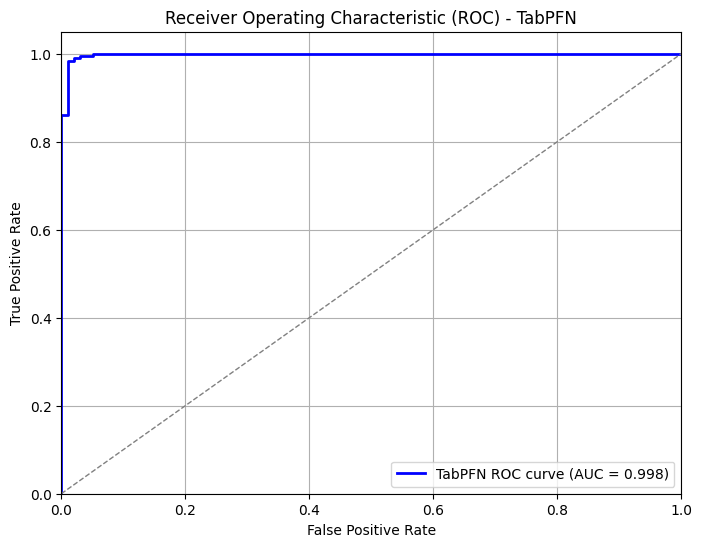

In [10]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from tabpfn import TabPFNClassifier

# Load data
X, y = load_breast_cancer(return_X_y=True)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Initialize and train TabPFN
clf = TabPFNClassifier()
clf.fit(X_train, y_train)

# Predict probabilities
probs = clf.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'TabPFN ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - TabPFN')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


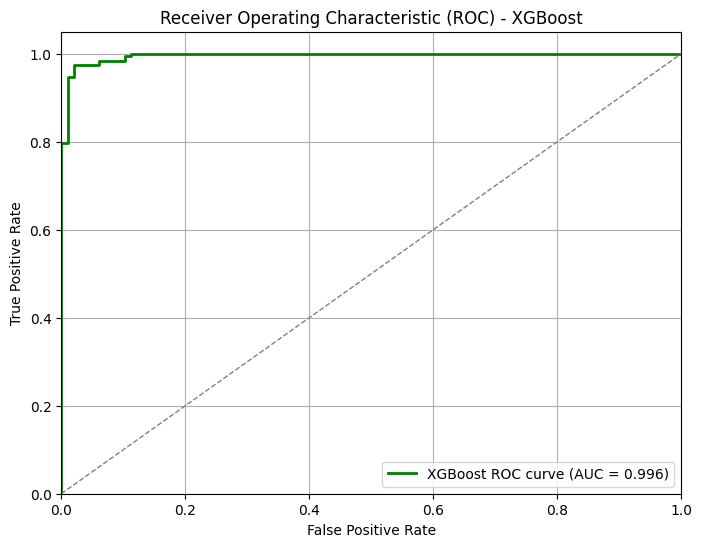

In [11]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

# Load data
X, y = load_breast_cancer(return_X_y=True)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Initialize and train XGBoost classifier
clf = XGBClassifier(eval_metric='logloss')
clf.fit(X_train, y_train)

# Predict probabilities for positive class
probs = clf.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='green', lw=2, label=f'XGBoost ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - XGBoost')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


XGBoost Metrics:
Accuracy: 0.9561
ROC AUC: 0.9908
Average Precision: 0.9939
Confusion Matrix:
[[40  3]
 [ 2 69]]

TabPFN Metrics:
Accuracy: 0.9737
ROC AUC: 0.9951
Average Precision: 0.9969
Confusion Matrix:
[[41  2]
 [ 1 70]]


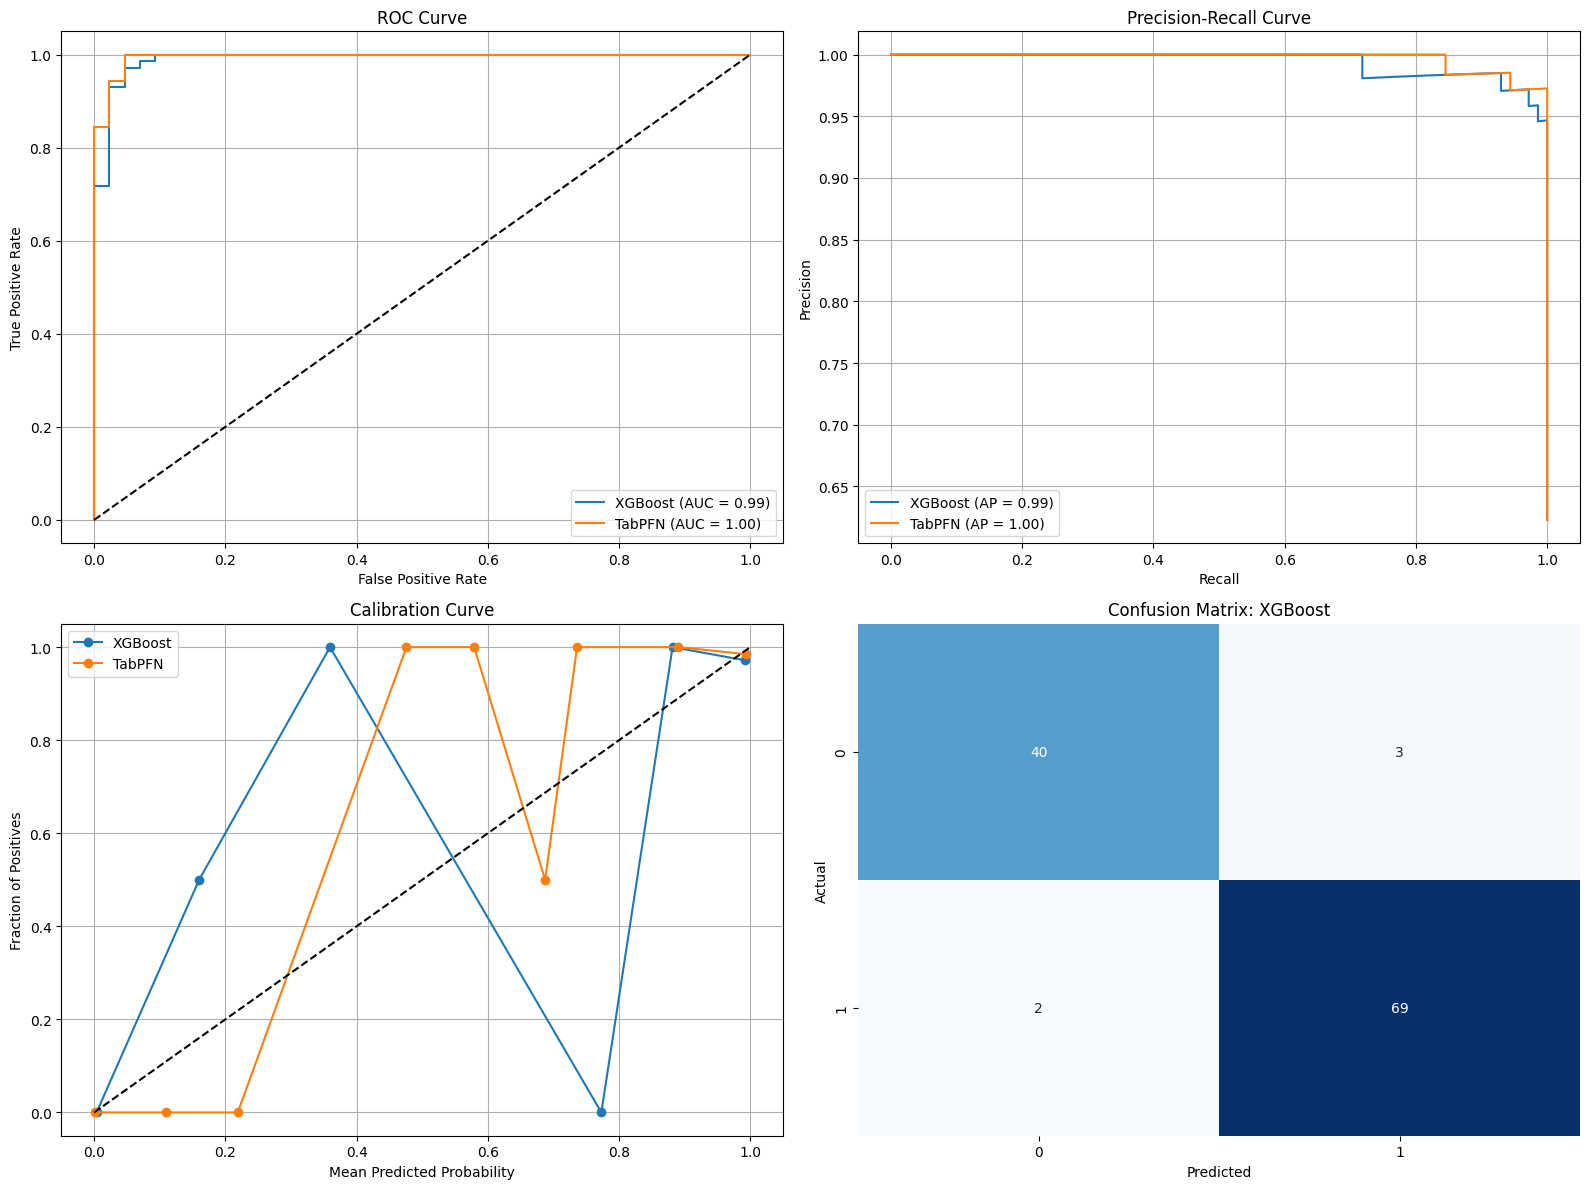

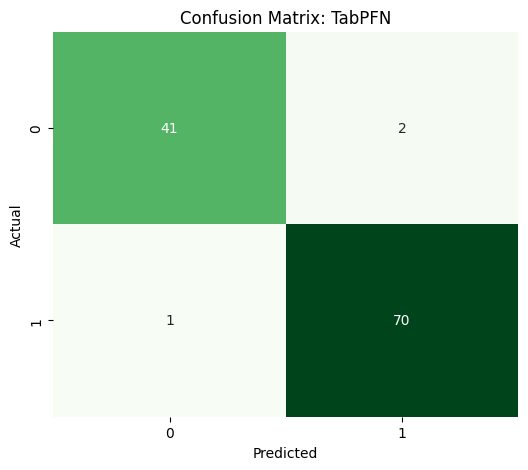

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import (
    roc_curve, auc,
    precision_recall_curve, average_precision_score,
    confusion_matrix, accuracy_score
)
from sklearn.calibration import calibration_curve
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from tabpfn import TabPFNClassifier
import numpy as np

# Load data
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Initialize classifiers
xgb_clf = XGBClassifier(eval_metric='logloss')
tabpfn_clf = TabPFNClassifier()

# Train models
xgb_clf.fit(X_train, y_train)
tabpfn_clf.fit(X_train, y_train)

# Predict probabilities
xgb_probs = xgb_clf.predict_proba(X_test)[:, 1]
tabpfn_probs = tabpfn_clf.predict_proba(X_test)[:, 1]

# Predict labels
xgb_preds = xgb_clf.predict(X_test)
tabpfn_preds = tabpfn_clf.predict(X_test)

# Calculate metrics
xgb_acc = accuracy_score(y_test, xgb_preds)
tabpfn_acc = accuracy_score(y_test, tabpfn_preds)

xgb_roc_auc = auc(*roc_curve(y_test, xgb_probs)[:2])
tabpfn_roc_auc = auc(*roc_curve(y_test, tabpfn_probs)[:2])

xgb_avg_precision = average_precision_score(y_test, xgb_probs)
tabpfn_avg_precision = average_precision_score(y_test, tabpfn_probs)

cm_xgb = confusion_matrix(y_test, xgb_preds)
cm_tabpfn = confusion_matrix(y_test, tabpfn_preds)

# Print metrics and confusion matrices
print("XGBoost Metrics:")
print(f"Accuracy: {xgb_acc:.4f}")
print(f"ROC AUC: {xgb_roc_auc:.4f}")
print(f"Average Precision: {xgb_avg_precision:.4f}")
print("Confusion Matrix:")
print(cm_xgb)

print("\nTabPFN Metrics:")
print(f"Accuracy: {tabpfn_acc:.4f}")
print(f"ROC AUC: {tabpfn_roc_auc:.4f}")
print(f"Average Precision: {tabpfn_avg_precision:.4f}")
print("Confusion Matrix:")
print(cm_tabpfn)

# ROC Curve data
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_probs)
fpr_tabpfn, tpr_tabpfn, _ = roc_curve(y_test, tabpfn_probs)

# Precision-Recall Curve data
prec_xgb, rec_xgb, _ = precision_recall_curve(y_test, xgb_probs)
prec_tabpfn, rec_tabpfn, _ = precision_recall_curve(y_test, tabpfn_probs)

# Calibration curve data
prob_true_xgb, prob_pred_xgb = calibration_curve(y_test, xgb_probs, n_bins=10)
prob_true_tabpfn, prob_pred_tabpfn = calibration_curve(y_test, tabpfn_probs, n_bins=10)

# Plotting
plt.figure(figsize=(16, 12))

# ROC Curve
plt.subplot(2, 2, 1)
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {xgb_roc_auc:.2f})')
plt.plot(fpr_tabpfn, tpr_tabpfn, label=f'TabPFN (AUC = {tabpfn_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)

# Precision-Recall Curve
plt.subplot(2, 2, 2)
plt.plot(rec_xgb, prec_xgb, label=f'XGBoost (AP = {xgb_avg_precision:.2f})')
plt.plot(rec_tabpfn, prec_tabpfn, label=f'TabPFN (AP = {tabpfn_avg_precision:.2f})')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.grid(True)

# Calibration Curve
plt.subplot(2, 2, 3)
plt.plot(prob_pred_xgb, prob_true_xgb, marker='o', label='XGBoost')
plt.plot(prob_pred_tabpfn, prob_true_tabpfn, marker='o', label='TabPFN')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('Calibration Curve')
plt.xlabel('Mean Predicted Probability')
plt.ylabel('Fraction of Positives')
plt.legend()
plt.grid(True)

# Confusion Matrix heatmaps
plt.subplot(2, 2, 4)
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix: XGBoost')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()

plt.figure(figsize=(6,5))
sns.heatmap(cm_tabpfn, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.title('Confusion Matrix: TabPFN')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [28]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

# Load dataset
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Display the first 5 rows
print(df.head())


   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

In [31]:
import pandas as pd

# Desired number of rows
n = 1000

# Base patterns
pattern_col1 = [2, 3, 4, 5]
pattern_col2 = [1, 2, 4, 3]

# Repeat and trim to length n
col_1 = (pattern_col1 * (n // len(pattern_col1) + 1))[:n]
col_2 = (pattern_col2 * (n // len(pattern_col2) + 1))[:n]

# Compute target as product
target = [a * b for a, b in zip(col_1, col_2)]

# Create DataFrame
df = pd.DataFrame({
    'col_1': col_1,
    'col_2': col_2,
    'target': target
})

# Display shape and head
print(f"Shape: {df.shape}")
print(df)

# Optional: Save to CSV
# df.to_csv('synthetic_data.csv', index=False)


Shape: (1000, 3)
     col_1  col_2  target
0        2      1       2
1        3      2       6
2        4      4      16
3        5      3      15
4        2      1       2
..     ...    ...     ...
995      5      3      15
996      2      1       2
997      3      2       6
998      4      4      16
999      5      3      15

[1000 rows x 3 columns]


In [55]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from tabpfn import TabPFNRegressor

# Step 1: Generate synthetic data
np.random.seed(42)
col1 = np.random.randint(1, 100, size=10000)
col2 = np.random.randint(1, 100, size=10000)
target = col1 + col2  # This is your target variable

# Step 2: Create DataFrame
df = pd.DataFrame({
    'col1': col1,
    'col2': col2,
    'target': target
})

# Step 3: Split into train/test sets
X = df[['col1', 'col2']]
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Step 4: Train TabPFNRegressor
regressor = TabPFNRegressor()
regressor.fit(X_train, y_train)

# Step 5: Predict and evaluate
predictions = regressor.predict(X_test)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)


Mean Squared Error (MSE): 0.006316489074379206
R² Score: 0.9999959468841553


In [58]:
import pandas as pd

new_sample = pd.DataFrame([[1, 5]], columns=['col1', 'col2'])
new_pred = regressor.predict(new_sample)
print("Prediction for new sample [10, 5]:", new_pred)

Prediction for new sample [10, 5]: [6.1242285]


In [59]:
import joblib

# Save the trained model to a file
joblib.dump(regressor, "tabpfn_regressor_model.joblib")

# If you are using Google Colab and want to download the model file to your computer:
# from google.colab import files
# files.download("tabpfn_regressor_model.joblib")


['tabpfn_regressor_model.joblib']

In [60]:
regressor_loaded = joblib.load("tabpfn_regressor_model.joblib")


In [61]:
regressor_loaded.predict(new_sample)

array([6.1242285], dtype=float32)

In [72]:
import numpy as np
import pandas as pd
import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from tabpfn import TabPFNRegressor
from xgboost import XGBRegressor

# Step 1: Generate synthetic data
np.random.seed(42)
col1 = np.random.randint(1, 100, size=1000)
col2 = np.random.randint(1, 100, size=1000)
target = col1 * col2  # target = product of col1 and col2

df = pd.DataFrame({
    'col1': col1,
    'col2': col2,
    'target': target
})

# Step 2: Prepare features and target
X = df[['col1', 'col2']]
y = df['target']

# Step 3: Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Initialize models
xgb = XGBRegressor()
tabpfn = TabPFNRegressor()

# Step 5: Train models
xgb.fit(X_train, y_train)
tabpfn.fit(X_train, y_train)

# Step 6: Measure inference speed and predict
start = time.time()
xgb_preds = xgb.predict(X_test)
end = time.time()
xgb_inference_time = end - start

start = time.time()
tabpfn_preds = tabpfn.predict(X_test)
end = time.time()
tabpfn_inference_time = end - start

# Step 7: Evaluate models
xgb_mse = mean_squared_error(y_test, xgb_preds)
xgb_r2 = r2_score(y_test, xgb_preds)

tabpfn_mse = mean_squared_error(y_test, tabpfn_preds)
tabpfn_r2 = r2_score(y_test, tabpfn_preds)

# Step 8: Print results
print(f"XGBoost inference time for {len(X_test)} samples: {xgb_inference_time:.6f} seconds")
print(f"TabPFN inference time for {len(X_test)} samples: {tabpfn_inference_time:.6f} seconds")

print(f"XGBoost MSE: {xgb_mse:.4f}, R²: {xgb_r2:.4f}")
print(f"TabPFN MSE: {tabpfn_mse:.4f}, R²: {tabpfn_r2:.4f}")


XGBoost inference time for 200 samples: 0.002554 seconds
TabPFN inference time for 200 samples: 0.378267 seconds
XGBoost MSE: 8511.9746, R²: 0.9983
TabPFN MSE: 45.6363, R²: 1.0000


Training with 10 samples...
XGBoost - Train time: 0.0290s, Inference time: 0.0031s, R²: -1.3344
TabPFN  - Train time: 0.6839s, Inference time: 0.3506s, R²: 0.2676
--------------------------------------------------
Training with 100 samples...
XGBoost - Train time: 0.0305s, Inference time: 0.0021s, R²: 0.9506
TabPFN  - Train time: 0.1931s, Inference time: 0.3688s, R²: 1.0000
--------------------------------------------------
Training with 1000 samples...
XGBoost - Train time: 0.0485s, Inference time: 0.0025s, R²: 0.9977
TabPFN  - Train time: 0.2206s, Inference time: 0.3839s, R²: 1.0000
--------------------------------------------------
Training with 5000 samples...
XGBoost - Train time: 0.0659s, Inference time: 0.0039s, R²: 0.9997
TabPFN  - Train time: 0.3627s, Inference time: 1.2605s, R²: 0.9999
--------------------------------------------------
Training with 10000 samples...
XGBoost - Train time: 0.0678s, Inference time: 0.0058s, R²: 0.9998
TabPFN  - Train time: 0.5549s, Inference tim

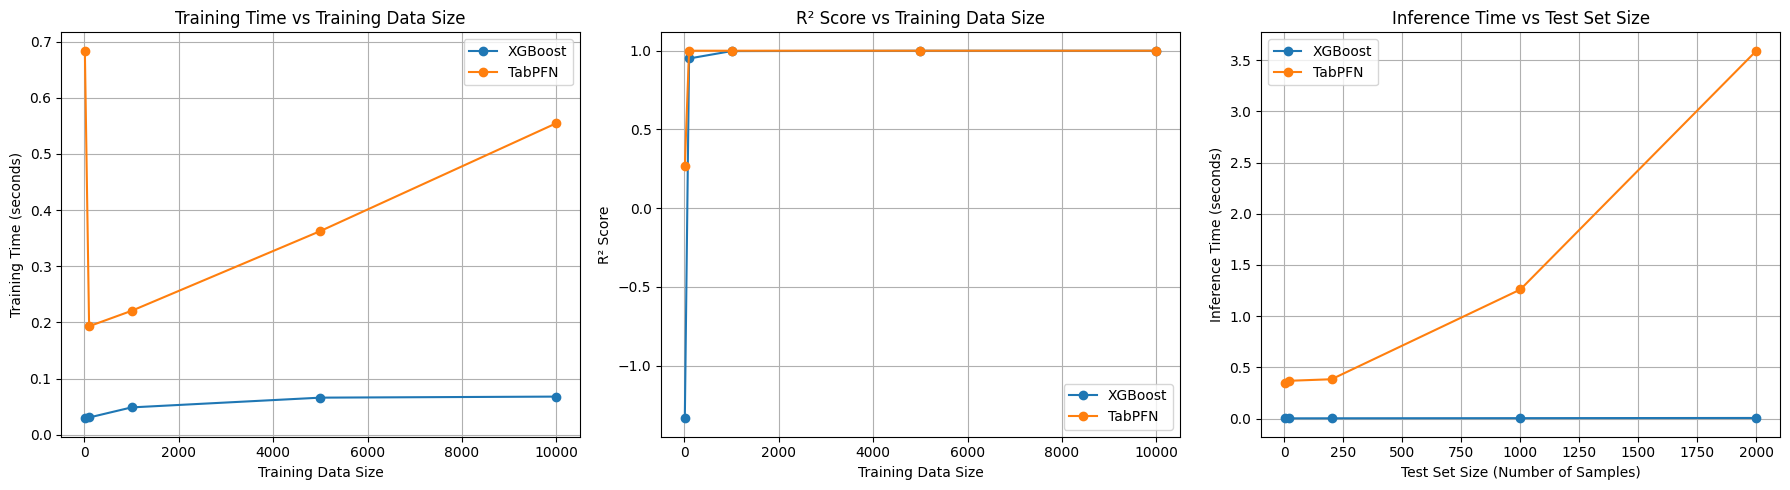

In [73]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from tabpfn import TabPFNRegressor
from xgboost import XGBRegressor

# Generate full synthetic dataset (max 10,000 samples)
np.random.seed(42)
max_samples = 10000
col1 = np.random.randint(1, 100, size=max_samples)
col2 = np.random.randint(1, 100, size=max_samples)
target = col1 * col2

df = pd.DataFrame({'col1': col1, 'col2': col2, 'target': target})

# Sizes of training data to evaluate
train_sizes = [10, 100, 1000, 5000, 10000]

# Lists to store results
xgb_train_times = []
tabpfn_train_times = []
xgb_r2_scores = []
tabpfn_r2_scores = []
xgb_inference_times = []
tabpfn_inference_times = []

for size in train_sizes:
    print(f"Training with {size} samples...")

    # Subset data to the current size
    df_subset = df.iloc[:size]
    X = df_subset[['col1', 'col2']]
    y = df_subset['target']

    # Split (use 80% train, 20% test)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # --- XGBoost ---
    xgb = XGBRegressor()

    start = time.time()
    xgb.fit(X_train, y_train)
    end = time.time()
    xgb_train_times.append(end - start)

    # Predict and measure inference time
    start = time.time()
    xgb_preds = xgb.predict(X_test)
    end = time.time()
    xgb_inference_times.append(end - start)

    # Calculate R² score
    xgb_r2 = r2_score(y_test, xgb_preds)
    xgb_r2_scores.append(xgb_r2)

    # --- TabPFN ---
    tabpfn = TabPFNRegressor()

    start = time.time()
    tabpfn.fit(X_train, y_train)
    end = time.time()
    tabpfn_train_times.append(end - start)

    # Predict and measure inference time
    start = time.time()
    tabpfn_preds = tabpfn.predict(X_test)
    end = time.time()
    tabpfn_inference_times.append(end - start)

    # Calculate R² score
    tabpfn_r2 = r2_score(y_test, tabpfn_preds)
    tabpfn_r2_scores.append(tabpfn_r2)

    print(f"XGBoost - Train time: {xgb_train_times[-1]:.4f}s, Inference time: {xgb_inference_times[-1]:.4f}s, R²: {xgb_r2:.4f}")
    print(f"TabPFN  - Train time: {tabpfn_train_times[-1]:.4f}s, Inference time: {tabpfn_inference_times[-1]:.4f}s, R²: {tabpfn_r2:.4f}")
    print("--------------------------------------------------")

# Plotting

plt.figure(figsize=(18, 5))

# 1. Training data size vs training time
plt.subplot(1, 3, 1)
plt.plot(train_sizes, xgb_train_times, label="XGBoost", marker='o')
plt.plot(train_sizes, tabpfn_train_times, label="TabPFN", marker='o')
plt.xlabel('Training Data Size')
plt.ylabel('Training Time (seconds)')
plt.title('Training Time vs Training Data Size')
plt.legend()
plt.grid(True)

# 2. Training data size vs R² score
plt.subplot(1, 3, 2)
plt.plot(train_sizes, xgb_r2_scores, label="XGBoost", marker='o')
plt.plot(train_sizes, tabpfn_r2_scores, label="TabPFN", marker='o')
plt.xlabel('Training Data Size')
plt.ylabel('R² Score')
plt.title('R² Score vs Training Data Size')
plt.legend()
plt.grid(True)

# 3. Test set size vs inference time (test size is always 20% of training size)
test_sizes = [int(0.2 * s) for s in train_sizes]
plt.subplot(1, 3, 3)
plt.plot(test_sizes, xgb_inference_times, label="XGBoost", marker='o')
plt.plot(test_sizes, tabpfn_inference_times, label="TabPFN", marker='o')
plt.xlabel('Test Set Size (Number of Samples)')
plt.ylabel('Inference Time (seconds)')
plt.title('Inference Time vs Test Set Size')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()



Training size: 10
XGBoost - Train time: 0.0271s, Inference time: 0.0025s, R²: 0.3749
TabPFN  - Train time: 0.3330s, Inference time: 0.4967s, R²: 0.9374

Training size: 100
XGBoost - Train time: 0.0459s, Inference time: 0.0029s, R²: 0.9842
TabPFN  - Train time: 0.3156s, Inference time: 0.3538s, R²: 1.0000

Training size: 1000
XGBoost - Train time: 0.0386s, Inference time: 0.0022s, R²: 0.9979
TabPFN  - Train time: 0.2108s, Inference time: 0.3856s, R²: 0.9999

Training size: 5000
XGBoost - Train time: 0.0544s, Inference time: 0.0038s, R²: 0.9996
TabPFN  - Train time: 0.3460s, Inference time: 1.2467s, R²: 1.0000

Training size: 10000
XGBoost - Train time: 0.0684s, Inference time: 0.0057s, R²: 0.9998
TabPFN  - Train time: 0.5455s, Inference time: 3.5858s, R²: 1.0000

Training size: 50000
XGBoost - Train time: 0.1815s, Inference time: 0.0228s, R²: 0.9999

Training size: 100000
XGBoost - Train time: 0.3468s, Inference time: 0.0468s, R²: 0.9999

Training size: 500000
XGBoost - Train time: 1.5

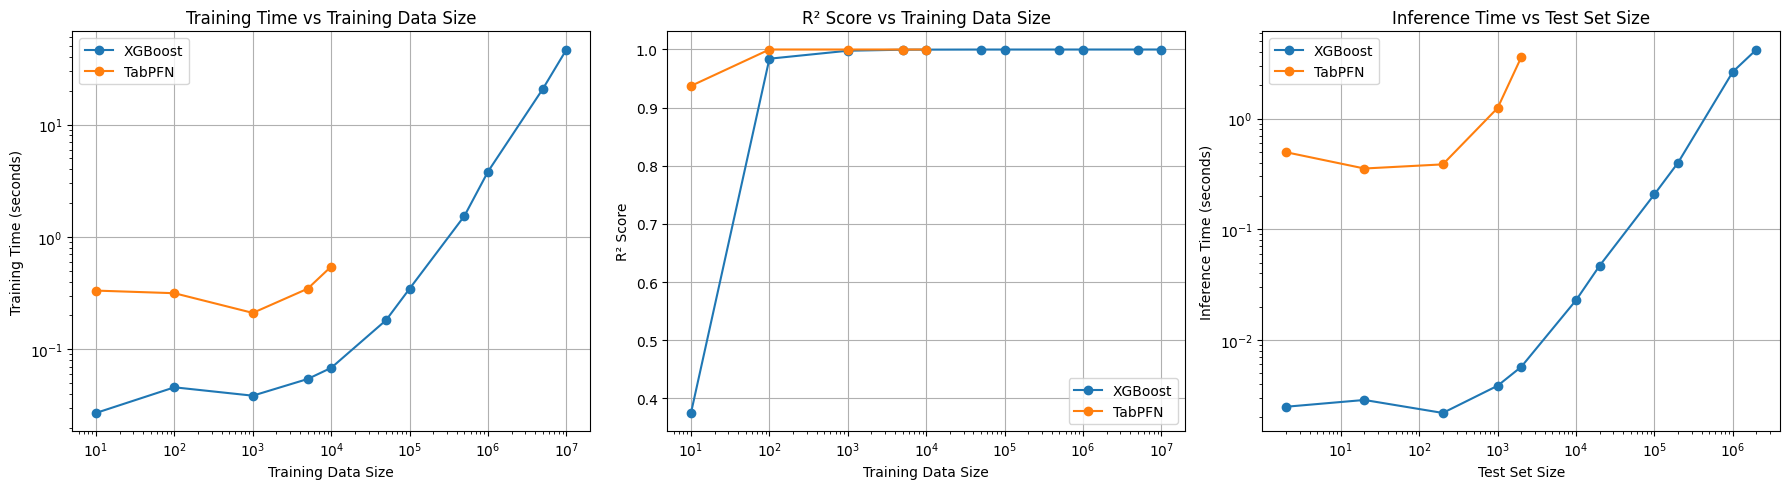

In [76]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from tabpfn import TabPFNRegressor
from xgboost import XGBRegressor

# Seed and max dataset size for generation
np.random.seed(42)
max_samples = 10_000_000  # 10 million max

# Generate large dataset once
col1 = np.random.randint(1, 100, size=max_samples)
col2 = np.random.randint(1, 100, size=max_samples)
target = col1 * col2
df = pd.DataFrame({'col1': col1, 'col2': col2, 'target': target})

# Define training sizes - small sizes for TabPFN, large sizes for XGBoost
train_sizes = [10, 100, 1000, 5000, 10000, 50000, 100000, 500000, 1_000_000, 5_000_000, 10_000_000]

# Prepare lists to store results
xgb_train_times = []
xgb_r2_scores = []
xgb_inference_times = []

tabpfn_train_times = []
tabpfn_r2_scores = []
tabpfn_inference_times = []

for size in train_sizes:
    print(f"\nTraining size: {size}")

    # Subset the data
    df_subset = df.iloc[:size]
    X = df_subset[['col1', 'col2']]
    y = df_subset['target']

    # Split 80% train, 20% test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # --- Always train XGBoost ---
    xgb = XGBRegressor()

    start = time.time()
    xgb.fit(X_train, y_train)
    end = time.time()
    train_time = end - start
    xgb_train_times.append(train_time)

    # Predict & measure inference time
    start = time.time()
    xgb_preds = xgb.predict(X_test)
    end = time.time()
    inference_time = end - start
    xgb_inference_times.append(inference_time)

    # R2 score
    r2 = r2_score(y_test, xgb_preds)
    xgb_r2_scores.append(r2)

    print(f"XGBoost - Train time: {train_time:.4f}s, Inference time: {inference_time:.4f}s, R²: {r2:.4f}")

    # --- TabPFN only if size <= 10000 ---
    if size <= 10000:
        tabpfn = TabPFNRegressor()

        start = time.time()
        tabpfn.fit(X_train, y_train)
        end = time.time()
        train_time = end - start
        tabpfn_train_times.append(train_time)

        start = time.time()
        tabpfn_preds = tabpfn.predict(X_test)
        end = time.time()
        inference_time = end - start
        tabpfn_inference_times.append(inference_time)

        r2 = r2_score(y_test, tabpfn_preds)
        tabpfn_r2_scores.append(r2)

        print(f"TabPFN  - Train time: {train_time:.4f}s, Inference time: {inference_time:.4f}s, R²: {r2:.4f}")
    else:
        # For sizes > 10,000 append None to keep list lengths consistent
        tabpfn_train_times.append(None)
        tabpfn_inference_times.append(None)
        tabpfn_r2_scores.append(None)

# Filter valid indices where TabPFN results exist (not None)
valid_indices = [i for i, v in enumerate(tabpfn_r2_scores) if v is not None]
valid_train_sizes = [train_sizes[i] for i in valid_indices]

plt.figure(figsize=(18, 5))

# Training time plot
plt.subplot(1, 3, 1)
plt.plot(train_sizes, xgb_train_times, label='XGBoost', marker='o')
tabpfn_train_filtered = [tabpfn_train_times[i] for i in valid_indices]
plt.plot(valid_train_sizes, tabpfn_train_filtered, label='TabPFN', marker='o')
plt.xlabel('Training Data Size')
plt.ylabel('Training Time (seconds)')
plt.title('Training Time vs Training Data Size')
plt.legend()
plt.grid(True)
plt.xscale('log')
plt.yscale('log')

# R² score plot
plt.subplot(1, 3, 2)
plt.plot(train_sizes, xgb_r2_scores, label='XGBoost', marker='o')
tabpfn_r2_filtered = [tabpfn_r2_scores[i] for i in valid_indices]
plt.plot(valid_train_sizes, tabpfn_r2_filtered, label='TabPFN', marker='o')
plt.xlabel('Training Data Size')
plt.ylabel('R² Score')
plt.title('R² Score vs Training Data Size')
plt.legend()
plt.grid(True)
plt.xscale('log')

# Inference time plot
plt.subplot(1, 3, 3)
plt.plot([int(0.2 * s) for s in train_sizes], xgb_inference_times, label='XGBoost', marker='o')
tabpfn_inference_filtered = [tabpfn_inference_times[i] for i in valid_indices]
plt.plot([int(0.2 * s) for s in valid_train_sizes], tabpfn_inference_filtered, label='TabPFN', marker='o')
plt.xlabel('Test Set Size')
plt.ylabel('Inference Time (seconds)')
plt.title('Inference Time vs Test Set Size')
plt.legend()
plt.grid(True)
plt.xscale('log')
plt.yscale('log')

plt.tight_layout()
plt.show()



Training size: 10
XGBoost - Train time: 0.0168s, Inference time: 0.0017s, R²: 0.3749
TabPFN  - Train time: 0.1927s, Inference time: 0.3447s, R²: 0.9374

Training size: 20
XGBoost - Train time: 0.0192s, Inference time: 0.0028s, R²: -1467.0674
TabPFN  - Train time: 0.2003s, Inference time: 0.3445s, R²: -432.2172

Training size: 30
XGBoost - Train time: 0.0191s, Inference time: 0.0018s, R²: 0.8965
TabPFN  - Train time: 0.1905s, Inference time: 0.3670s, R²: 0.9980

Training size: 40
XGBoost - Train time: 0.0209s, Inference time: 0.0017s, R²: 0.8713
TabPFN  - Train time: 0.1844s, Inference time: 0.3460s, R²: 0.9961

Training size: 50
XGBoost - Train time: 0.0218s, Inference time: 0.0018s, R²: 0.9465
TabPFN  - Train time: 0.1799s, Inference time: 0.3623s, R²: 1.0000

Training size: 60
XGBoost - Train time: 0.0222s, Inference time: 0.0018s, R²: 0.9667
TabPFN  - Train time: 0.1822s, Inference time: 0.3441s, R²: 0.9999

Training size: 70
XGBoost - Train time: 0.0234s, Inference time: 0.0018s, 

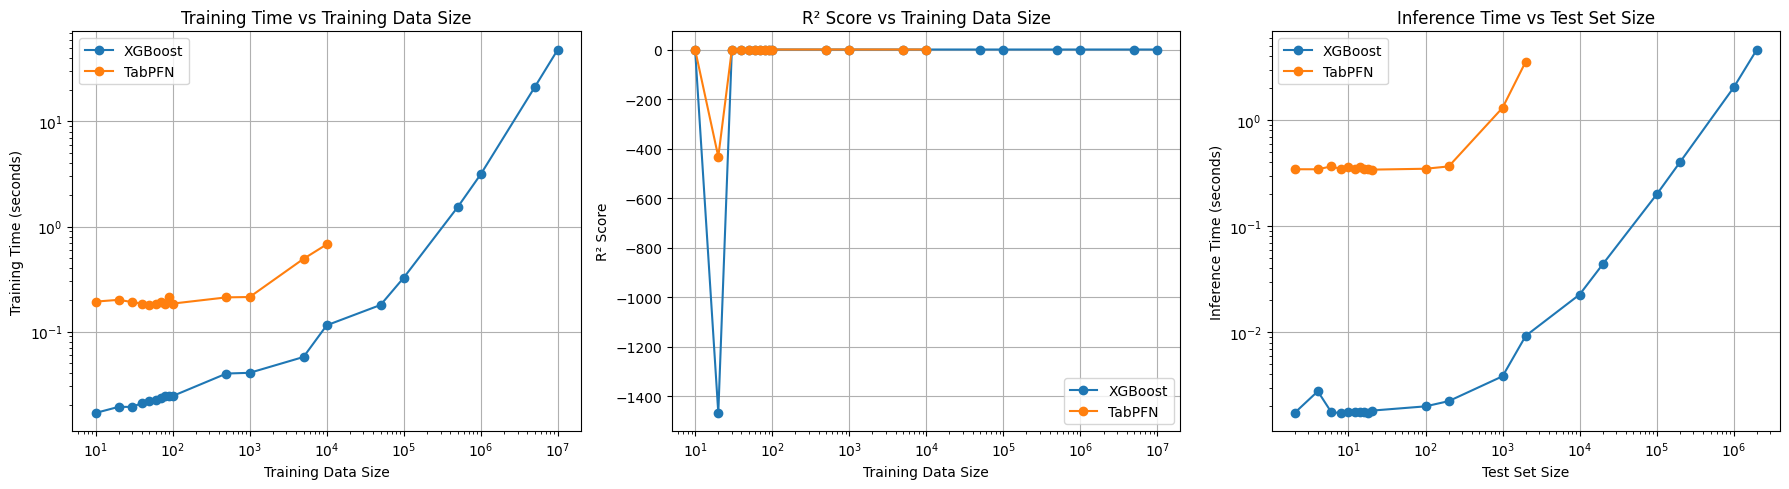

In [77]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from tabpfn import TabPFNRegressor
from xgboost import XGBRegressor

# Seed and max dataset size for generation
np.random.seed(42)
max_samples = 10_000_000  # 10 million max

# Generate large dataset once
col1 = np.random.randint(1, 100, size=max_samples)
col2 = np.random.randint(1, 100, size=max_samples)
target = col1 * col2
df = pd.DataFrame({'col1': col1, 'col2': col2, 'target': target})

# Define training sizes with fine steps from 10 to 100, then bigger steps
train_sizes = list(range(10, 101, 10)) + [500, 1000, 5000, 10000, 50000, 100000, 500000, 1_000_000, 5_000_000, 10_000_000]

# Prepare lists to store results
xgb_train_times = []
xgb_r2_scores = []
xgb_inference_times = []
xgb_test_sizes = []

tabpfn_train_times = []
tabpfn_r2_scores = []
tabpfn_inference_times = []
tabpfn_test_sizes = []

for size in train_sizes:
    print(f"\nTraining size: {size}")

    df_subset = df.iloc[:size]
    X = df_subset[['col1', 'col2']]
    y = df_subset['target']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    test_size = len(X_test)

    # Train XGBoost
    xgb = XGBRegressor()
    start = time.time()
    xgb.fit(X_train, y_train)
    end = time.time()
    xgb_train_times.append(end - start)

    start = time.time()
    xgb_preds = xgb.predict(X_test)
    end = time.time()
    xgb_inference_times.append(end - start)
    xgb_test_sizes.append(test_size)

    xgb_r2_scores.append(r2_score(y_test, xgb_preds))
    print(f"XGBoost - Train time: {xgb_train_times[-1]:.4f}s, Inference time: {xgb_inference_times[-1]:.4f}s, R²: {xgb_r2_scores[-1]:.4f}")

    # TabPFN only for size <= 10000
    if size <= 10000:
        tabpfn = TabPFNRegressor()
        start = time.time()
        tabpfn.fit(X_train, y_train)
        end = time.time()
        tabpfn_train_times.append(end - start)

        start = time.time()
        tabpfn_preds = tabpfn.predict(X_test)
        end = time.time()
        tabpfn_inference_times.append(end - start)
        tabpfn_test_sizes.append(test_size)

        tabpfn_r2_scores.append(r2_score(y_test, tabpfn_preds))
        print(f"TabPFN  - Train time: {tabpfn_train_times[-1]:.4f}s, Inference time: {tabpfn_inference_times[-1]:.4f}s, R²: {tabpfn_r2_scores[-1]:.4f}")
    else:
        tabpfn_train_times.append(None)
        tabpfn_inference_times.append(None)
        tabpfn_r2_scores.append(None)
        tabpfn_test_sizes.append(None)

# Plotting results

plt.figure(figsize=(18, 5))

# Training time plot
plt.subplot(1, 3, 1)
plt.plot(train_sizes, xgb_train_times, label='XGBoost', marker='o')
plt.plot([ts for ts in train_sizes if ts <= 10000], tabpfn_train_times[:len([ts for ts in train_sizes if ts <= 10000])], label='TabPFN', marker='o')
plt.xlabel('Training Data Size')
plt.ylabel('Training Time (seconds)')
plt.title('Training Time vs Training Data Size')
plt.legend()
plt.grid(True)
plt.xscale('log')
plt.yscale('log')

# R² score plot
plt.subplot(1, 3, 2)
plt.plot(train_sizes, xgb_r2_scores, label='XGBoost', marker='o')
plt.plot([ts for ts in train_sizes if ts <= 10000], [v for v in tabpfn_r2_scores if v is not None], label='TabPFN', marker='o')
plt.xlabel('Training Data Size')
plt.ylabel('R² Score')
plt.title('R² Score vs Training Data Size')
plt.legend()
plt.grid(True)
plt.xscale('log')

# Inference time vs test set size plot
plt.subplot(1, 3, 3)
plt.plot(xgb_test_sizes, xgb_inference_times, label='XGBoost', marker='o')
plt.plot([ts for ts in tabpfn_test_sizes if ts is not None], [v for v in tabpfn_inference_times if v is not None], label='TabPFN', marker='o')
plt.xlabel('Test Set Size')
plt.ylabel('Inference Time (seconds)')
plt.title('Inference Time vs Test Set Size')
plt.legend()
plt.grid(True)
plt.xscale('log')
plt.yscale('log')

plt.tight_layout()
plt.show()



Training size: 10
XGBoost - Train time: 0.0193s, Inference time: 0.0037s, R²: -0.3164
TabPFN  - Train time: 0.3150s, Inference time: 0.3618s, R²: 0.1314

Training size: 20
XGBoost - Train time: 0.0220s, Inference time: 0.0035s, R²: -0.3656
TabPFN  - Train time: 0.2254s, Inference time: 0.3465s, R²: 0.7193

Training size: 30
XGBoost - Train time: 0.0246s, Inference time: 0.0038s, R²: 0.2906
TabPFN  - Train time: 0.2434s, Inference time: 0.3491s, R²: 0.8231

Training size: 40
XGBoost - Train time: 0.0263s, Inference time: 0.0036s, R²: 0.7021
TabPFN  - Train time: 0.2298s, Inference time: 0.3484s, R²: 0.9470

Training size: 50
XGBoost - Train time: 0.0417s, Inference time: 0.0050s, R²: 0.0671
TabPFN  - Train time: 0.2230s, Inference time: 0.3464s, R²: 0.9675

Training size: 60
XGBoost - Train time: 0.0307s, Inference time: 0.0038s, R²: 0.2873
TabPFN  - Train time: 0.2248s, Inference time: 0.3725s, R²: 0.9934

Training size: 70
XGBoost - Train time: 0.0338s, Inference time: 0.0036s, R²: 0

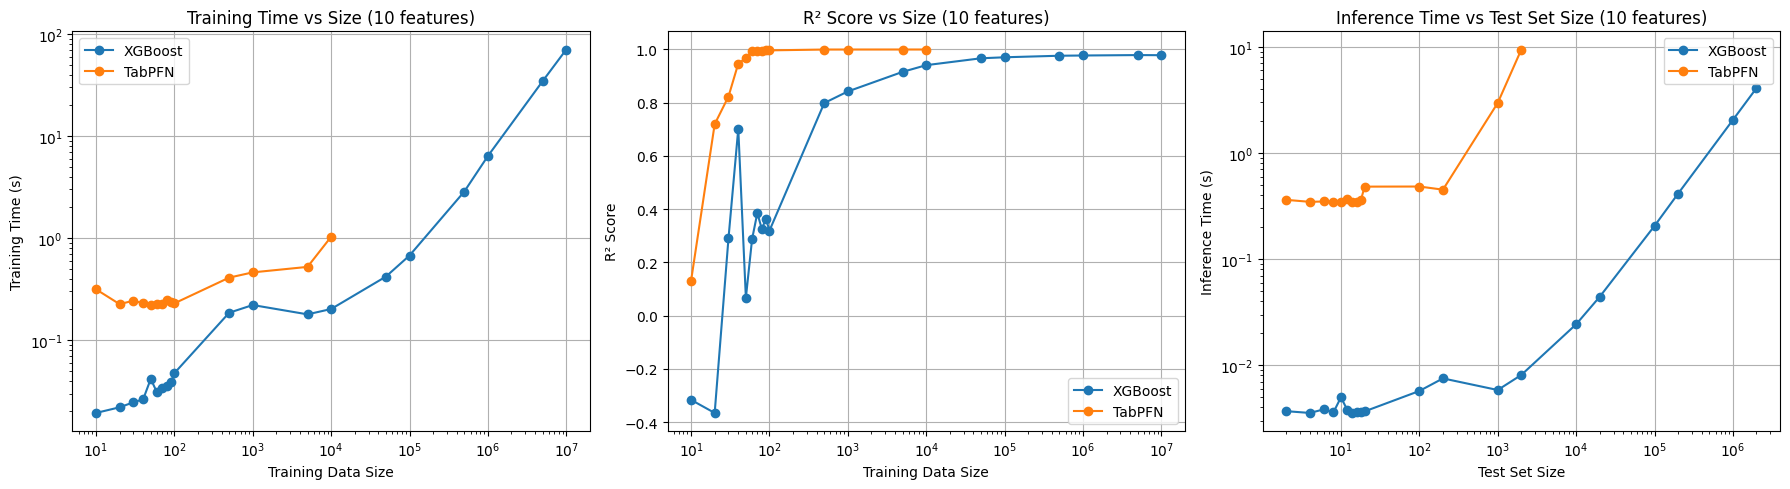

In [79]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from tabpfn import TabPFNRegressor
from xgboost import XGBRegressor

# Config
np.random.seed(42)
num_features = 10  # Change this to 2, 5, 10, 20, etc.
max_samples = 10_000_000

# Generate synthetic data
data = {}
for i in range(num_features):
    data[f'col{i+1}'] = np.random.randint(1, 100, size=max_samples)

# Define the target: e.g., sum of products of pairs
target = np.sum([data[col] for col in data], axis=0)
df = pd.DataFrame(data)
df['target'] = target

# Training sizes
train_sizes = list(range(10, 101, 10)) + [500, 1000, 5000, 10000, 50000, 100000, 500000, 1_000_000, 5_000_000, 10_000_000]

# Results storage
xgb_train_times, xgb_r2_scores, xgb_inference_times, xgb_test_sizes = [], [], [], []
tabpfn_train_times, tabpfn_r2_scores, tabpfn_inference_times, tabpfn_test_sizes = [], [], [], []

for size in train_sizes:
    print(f"\nTraining size: {size}")
    df_subset = df.iloc[:size]
    X = df_subset.drop(columns='target')
    y = df_subset['target']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    test_size = len(X_test)

    # XGBoost
    xgb = XGBRegressor()
    start = time.time()
    xgb.fit(X_train, y_train)
    end = time.time()
    xgb_train_times.append(end - start)

    start = time.time()
    xgb_preds = xgb.predict(X_test)
    end = time.time()
    xgb_inference_times.append(end - start)
    xgb_test_sizes.append(test_size)
    xgb_r2_scores.append(r2_score(y_test, xgb_preds))
    print(f"XGBoost - Train time: {xgb_train_times[-1]:.4f}s, Inference time: {xgb_inference_times[-1]:.4f}s, R²: {xgb_r2_scores[-1]:.4f}")

    # TabPFN only if training size is within limit
    if size <= 10000:
        tabpfn = TabPFNRegressor()
        start = time.time()
        tabpfn.fit(X_train, y_train)
        end = time.time()
        tabpfn_train_times.append(end - start)

        start = time.time()
        tabpfn_preds = tabpfn.predict(X_test)
        end = time.time()
        tabpfn_inference_times.append(end - start)
        tabpfn_test_sizes.append(test_size)
        tabpfn_r2_scores.append(r2_score(y_test, tabpfn_preds))
        print(f"TabPFN  - Train time: {tabpfn_train_times[-1]:.4f}s, Inference time: {tabpfn_inference_times[-1]:.4f}s, R²: {tabpfn_r2_scores[-1]:.4f}")
    else:
        tabpfn_train_times.append(None)
        tabpfn_inference_times.append(None)
        tabpfn_r2_scores.append(None)
        tabpfn_test_sizes.append(None)

# Plotting
plt.figure(figsize=(18, 5))

# Train time
plt.subplot(1, 3, 1)
plt.plot(train_sizes, xgb_train_times, label='XGBoost', marker='o')
plt.plot([ts for ts in train_sizes if ts <= 10000], tabpfn_train_times[:len([ts for ts in train_sizes if ts <= 10000])], label='TabPFN', marker='o')
plt.xlabel('Training Data Size')
plt.ylabel('Training Time (s)')
plt.title(f'Training Time vs Size ({num_features} features)')
plt.legend()
plt.grid(True)
plt.xscale('log')
plt.yscale('log')

# R²
plt.subplot(1, 3, 2)
plt.plot(train_sizes, xgb_r2_scores, label='XGBoost', marker='o')
plt.plot([ts for ts in train_sizes if ts <= 10000], [v for v in tabpfn_r2_scores if v is not None], label='TabPFN', marker='o')
plt.xlabel('Training Data Size')
plt.ylabel('R² Score')
plt.title(f'R² Score vs Size ({num_features} features)')
plt.legend()
plt.grid(True)
plt.xscale('log')

# Inference time vs test set size
plt.subplot(1, 3, 3)
plt.plot(xgb_test_sizes, xgb_inference_times, label='XGBoost', marker='o')
plt.plot([ts for ts in tabpfn_test_sizes if ts is not None], [v for v in tabpfn_inference_times if v is not None], label='TabPFN', marker='o')
plt.xlabel('Test Set Size')
plt.ylabel('Inference Time (s)')
plt.title(f'Inference Time vs Test Set Size ({num_features} features)')
plt.legend()
plt.grid(True)
plt.xscale('log')
plt.yscale('log')

plt.tight_layout()
plt.show()



--- Feature Count: 2 ---

--- Feature Count: 5 ---

--- Feature Count: 10 ---

--- Feature Count: 20 ---

--- Feature Count: 50 ---

--- Feature Count: 100 ---


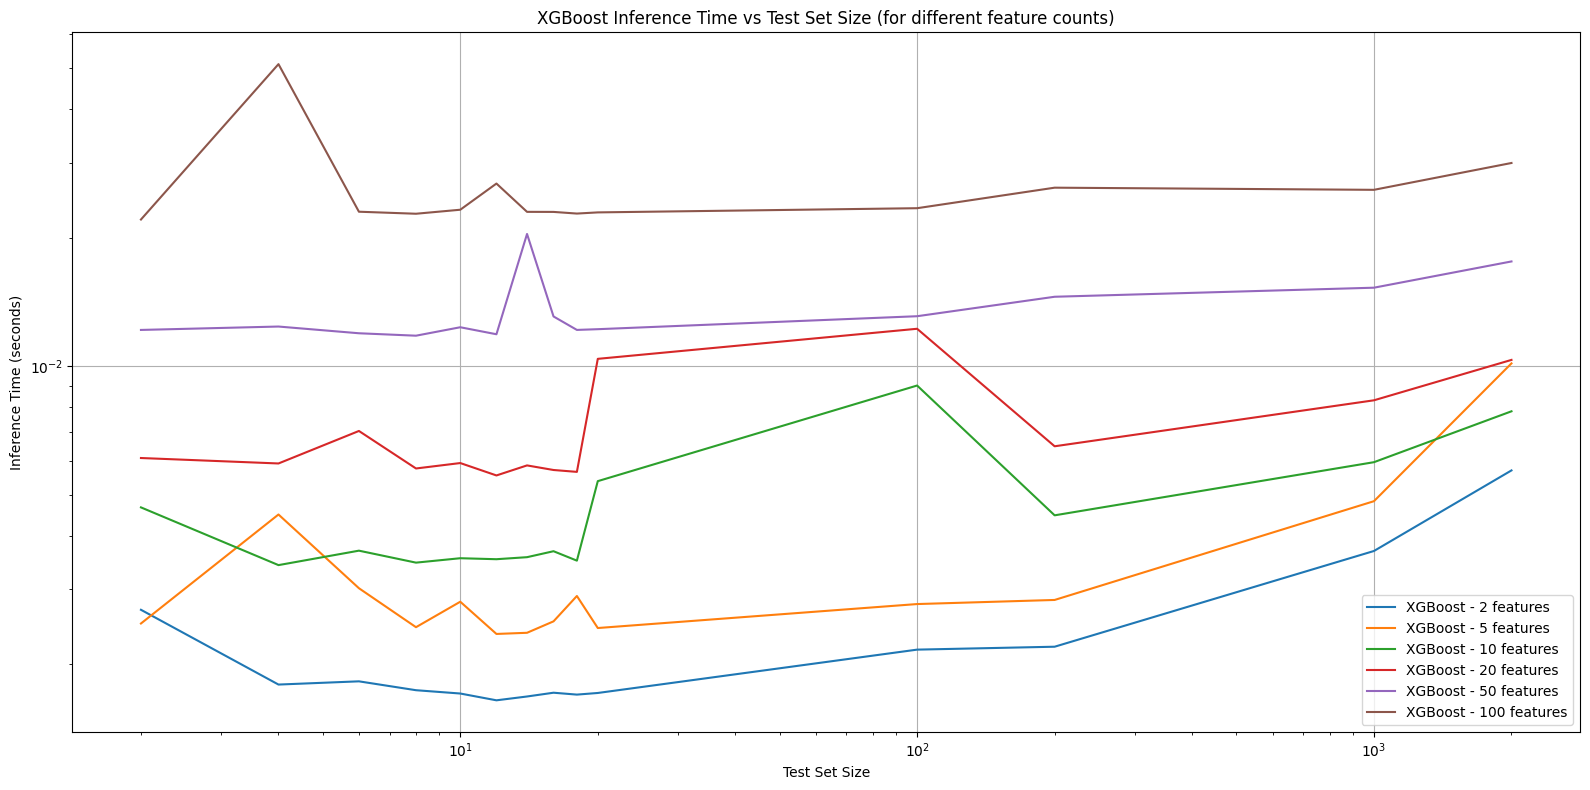

In [3]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from tabpfn import TabPFNRegressor
from xgboost import XGBRegressor

# Define feature counts and training sizes
feature_counts = [2, 5, 10, 20, 50, 100]
train_sizes = list(range(10, 101, 10)) + [500, 1000, 5000, 10000]

# Store results
results = {}

for num_features in feature_counts:
    print(f"\n--- Feature Count: {num_features} ---")

    # Generate dataset
    max_samples = 11000
    np.random.seed(42)
    data = {f'col{i+1}': np.random.randint(1, 100, size=max_samples) for i in range(num_features)}
    df = pd.DataFrame(data)
    target = df.sum(axis=1)  # Simple linear target
    df['target'] = target

    xgb_train_times = []
    xgb_r2_scores = []
    xgb_inference_times = []
    xgb_test_sizes = []

    tabpfn_train_times = []
    tabpfn_r2_scores = []
    tabpfn_inference_times = []
    tabpfn_test_sizes = []

    for size in train_sizes:
        if size > max_samples:
            break

        X = df.iloc[:size, :-1]
        y = df.iloc[:size, -1]

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # --- XGBoost ---
        xgb = XGBRegressor()
        start = time.time()
        xgb.fit(X_train, y_train)
        xgb_train_times.append(time.time() - start)

        start = time.time()
        xgb_preds = xgb.predict(X_test)
        xgb_inference_times.append(time.time() - start)

        r2 = r2_score(y_test, xgb_preds)
        xgb_r2_scores.append(round(r2, 2))
        xgb_test_sizes.append(len(X_test))

        # --- TabPFN if applicable ---
        if size <= 10000:
            tabpfn = TabPFNRegressor()
            start = time.time()
            tabpfn.fit(X_train, y_train)
            tabpfn_train_times.append(time.time() - start)

            start = time.time()
            tabpfn_preds = tabpfn.predict(X_test)
            tabpfn_inference_times.append(time.time() - start)

            r2 = r2_score(y_test, tabpfn_preds)
            tabpfn_r2_scores.append(round(r2, 2))
            tabpfn_test_sizes.append(len(X_test))
        else:
            tabpfn_train_times.append(None)
            tabpfn_inference_times.append(None)
            tabpfn_r2_scores.append(None)
            tabpfn_test_sizes.append(len(X_test))

    results[num_features] = {
        'xgb': {
            'train_time': xgb_train_times,
            'r2': xgb_r2_scores,
            'inference_time': xgb_inference_times,
            'test_sizes': xgb_test_sizes,
        },
        'tabpfn': {
            'train_time': tabpfn_train_times,
            'r2': tabpfn_r2_scores,
            'inference_time': tabpfn_inference_times,
            'test_sizes': tabpfn_test_sizes,
        }
    }


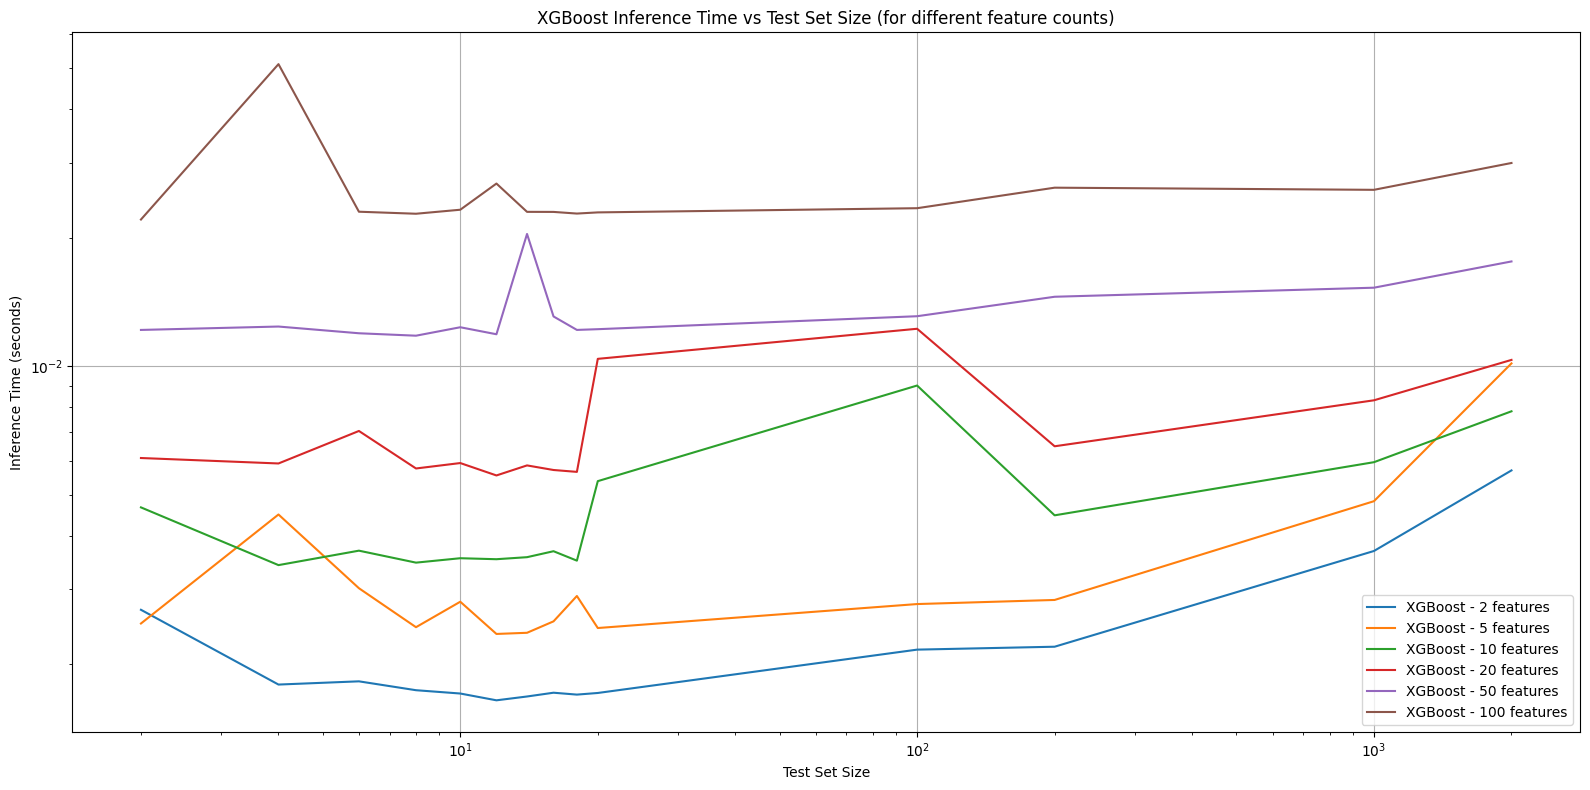

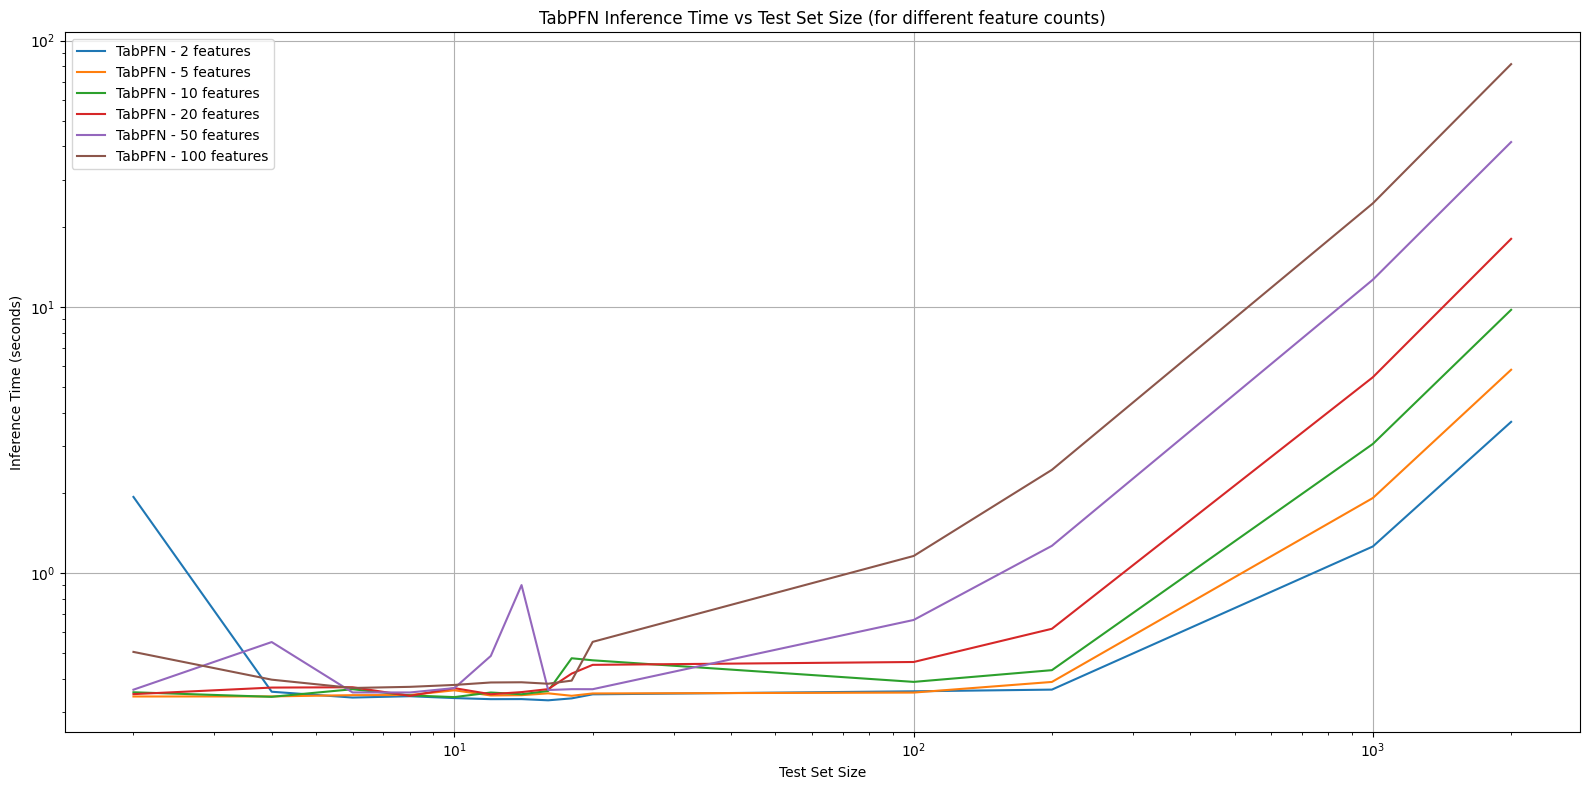

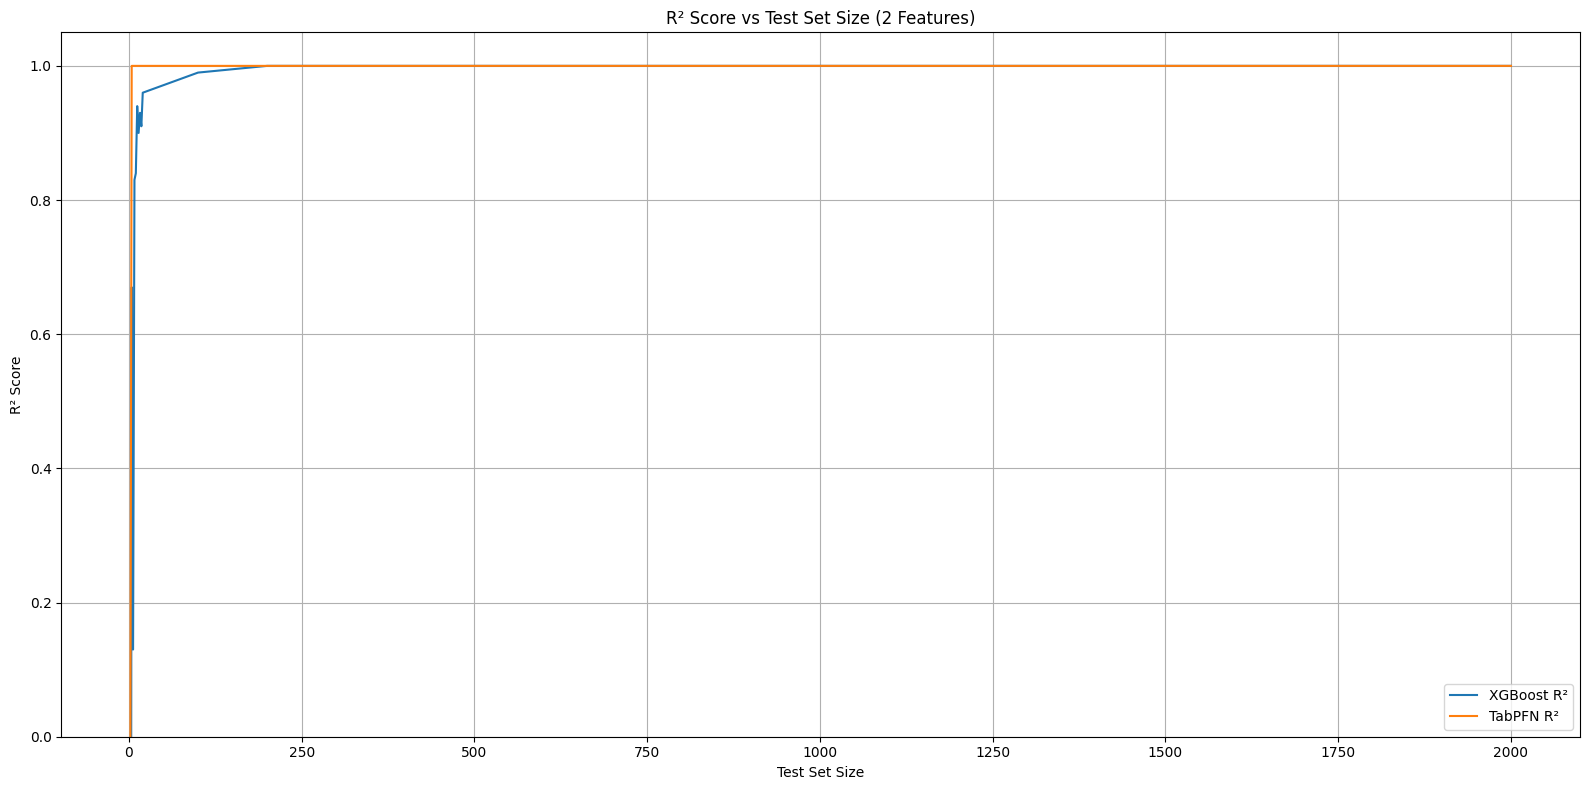

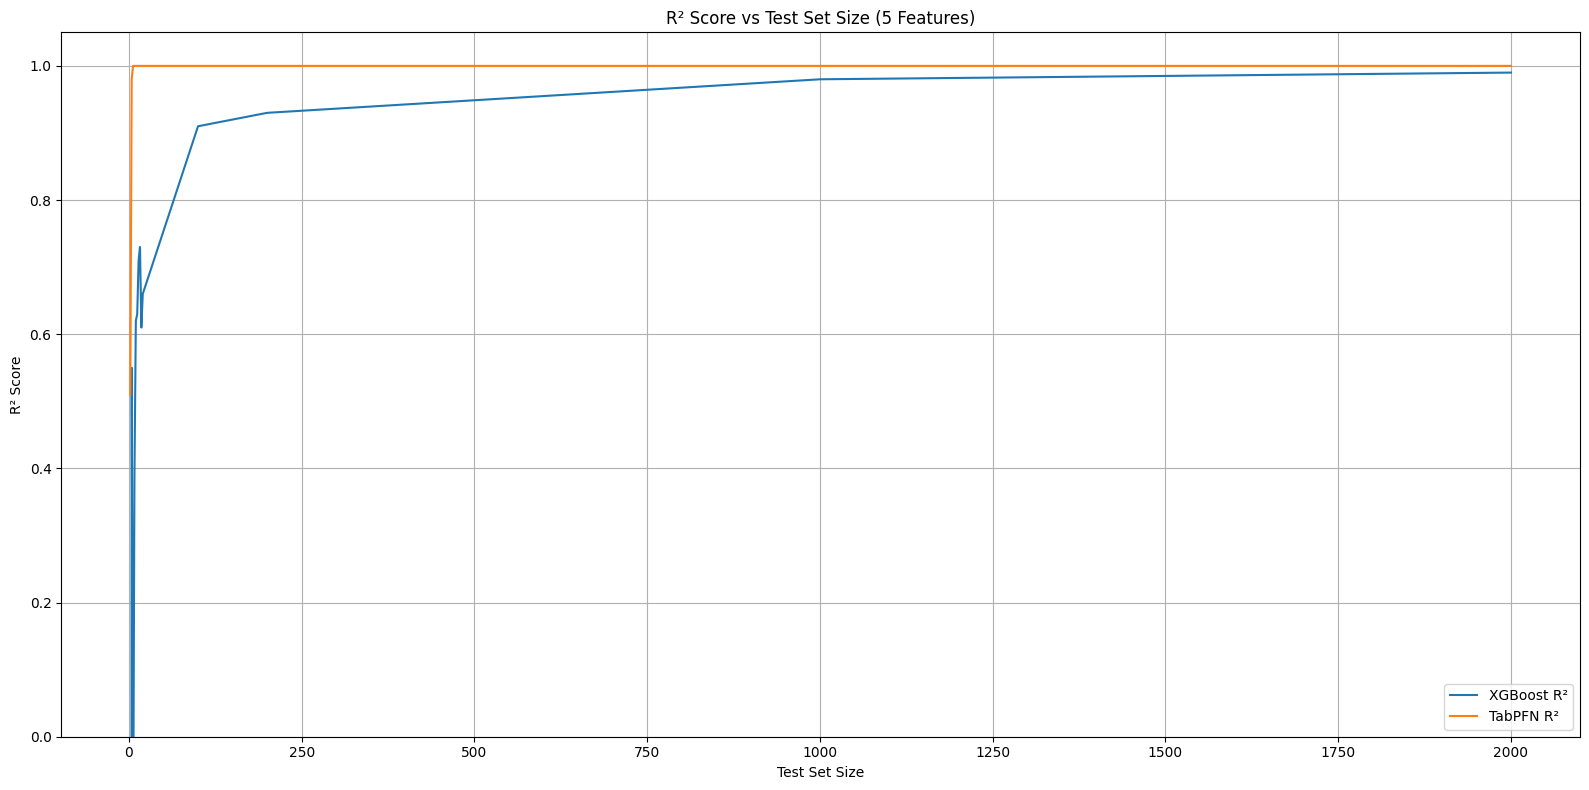

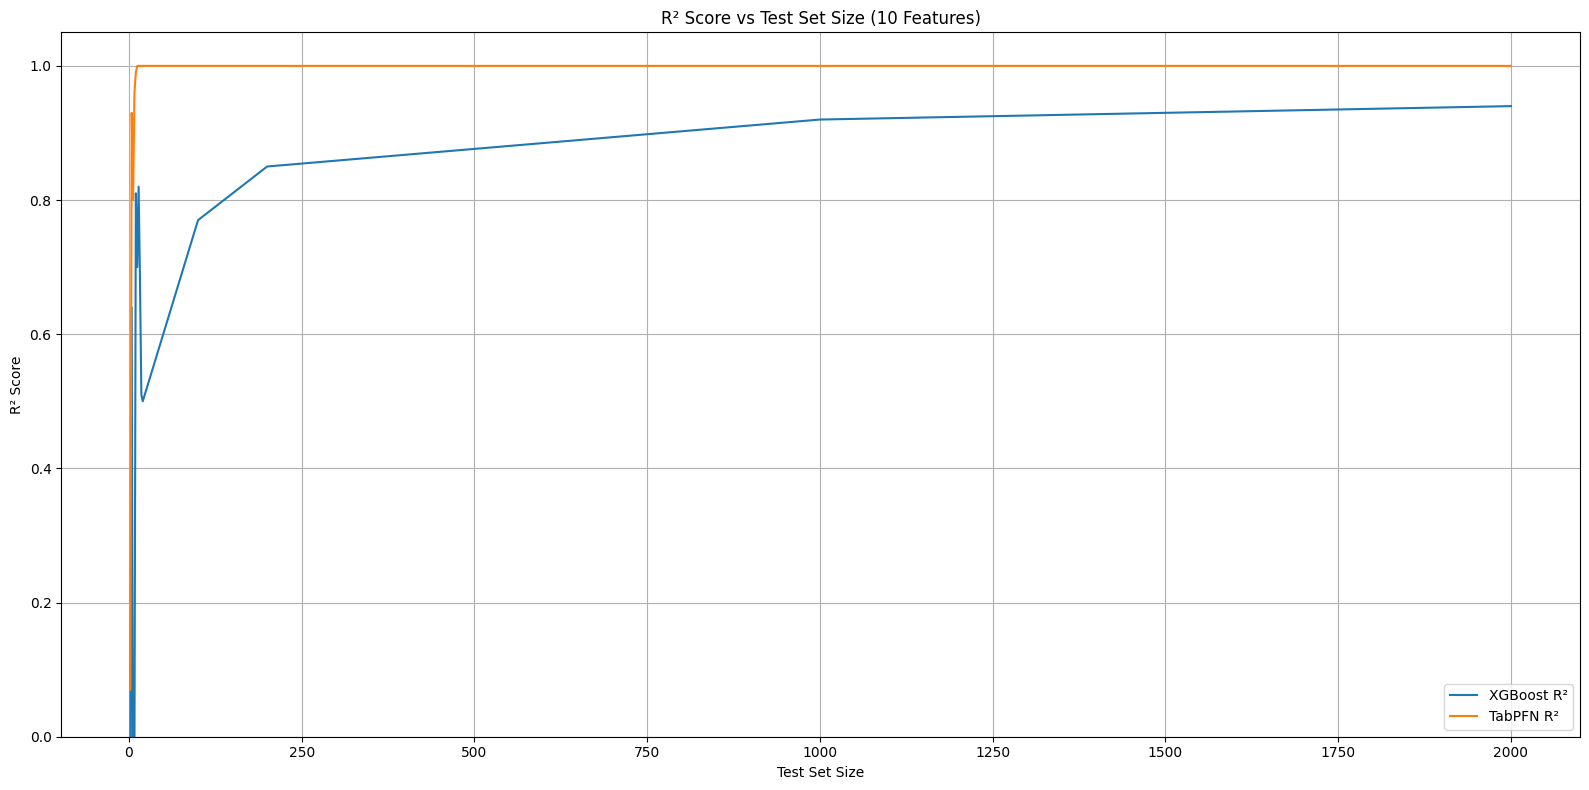

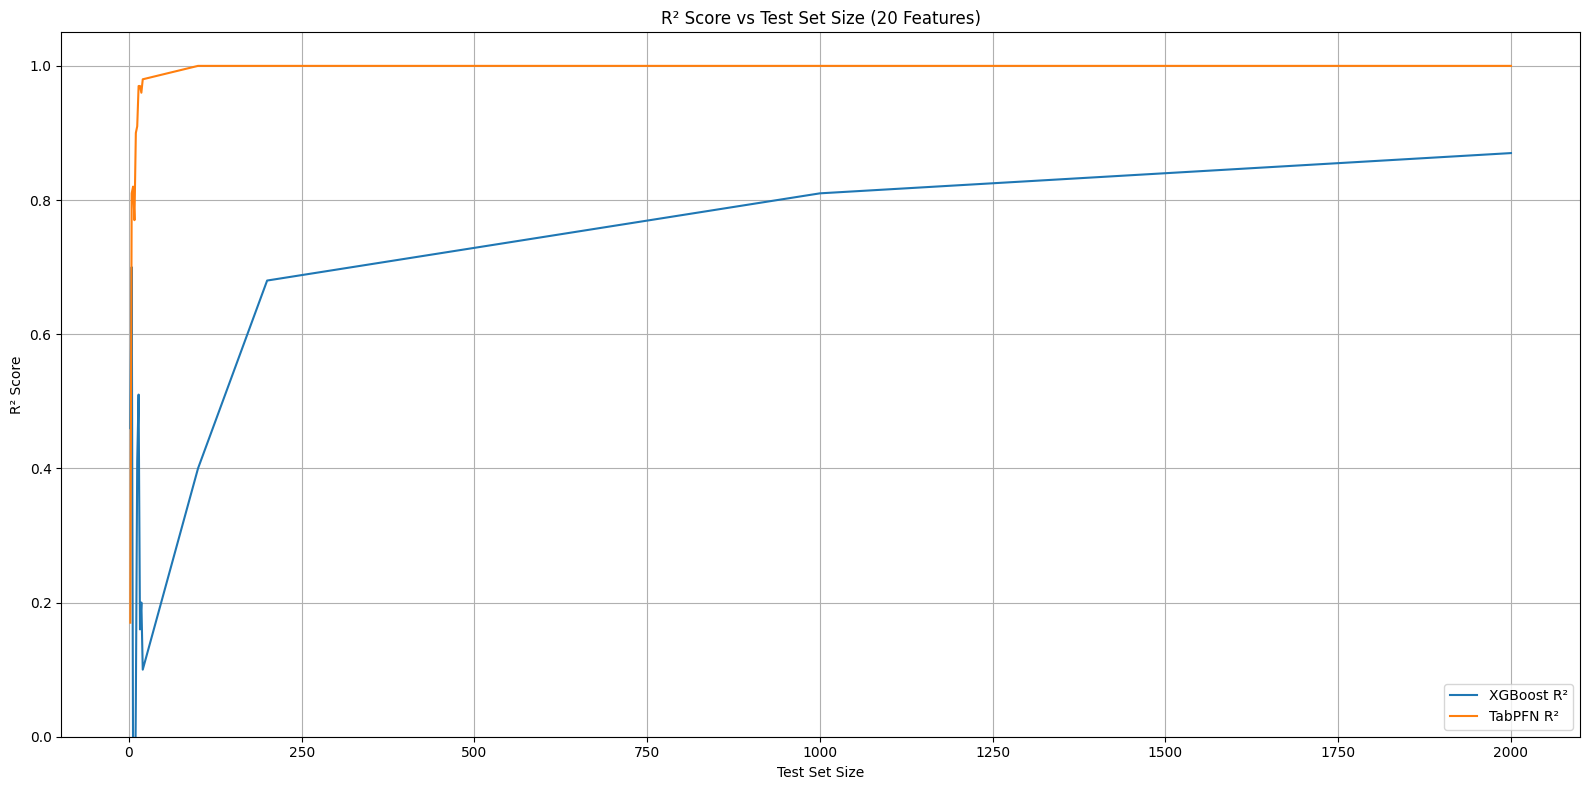

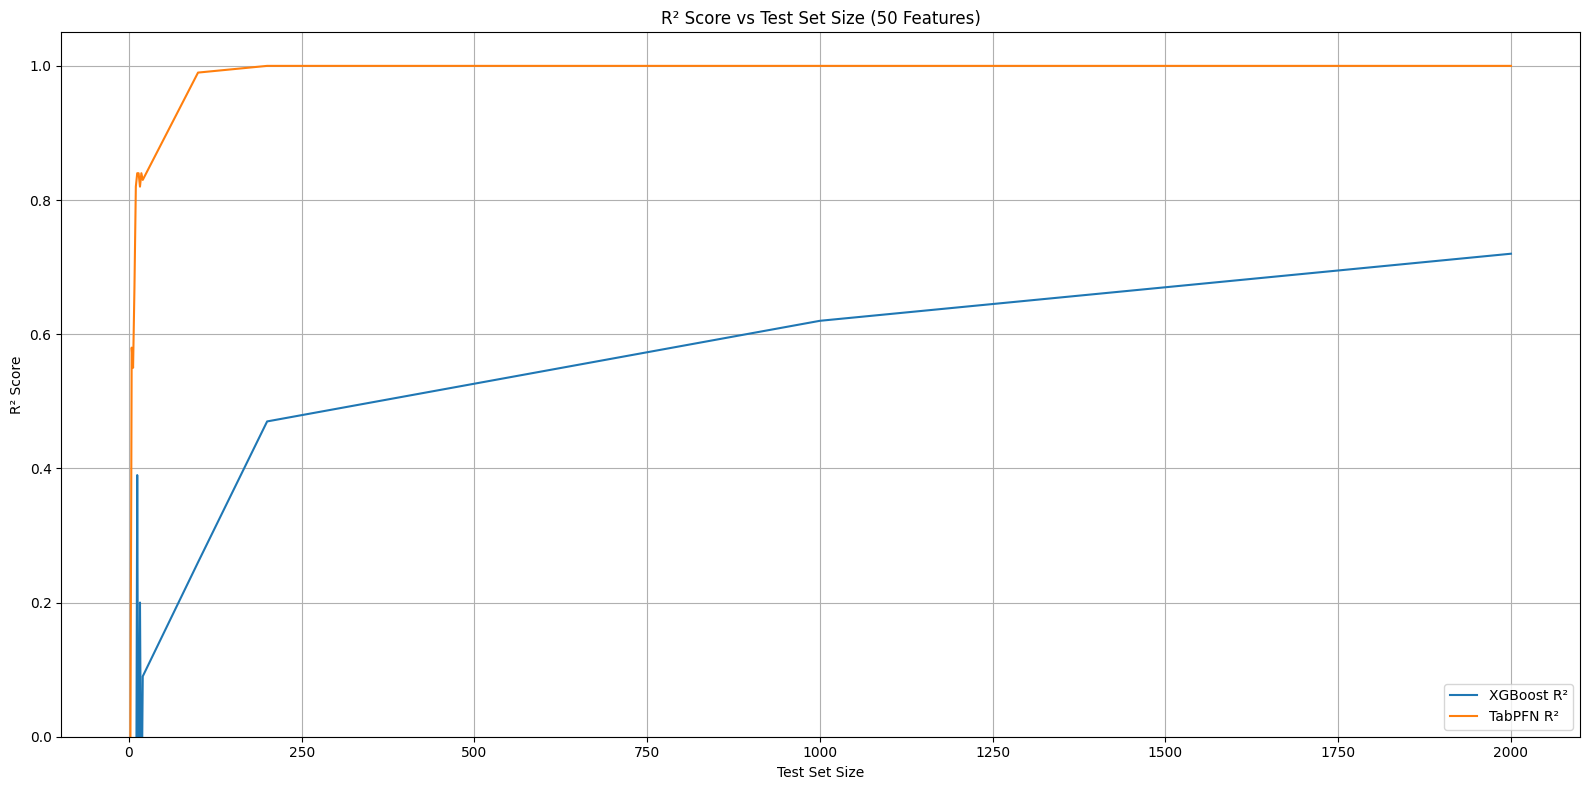

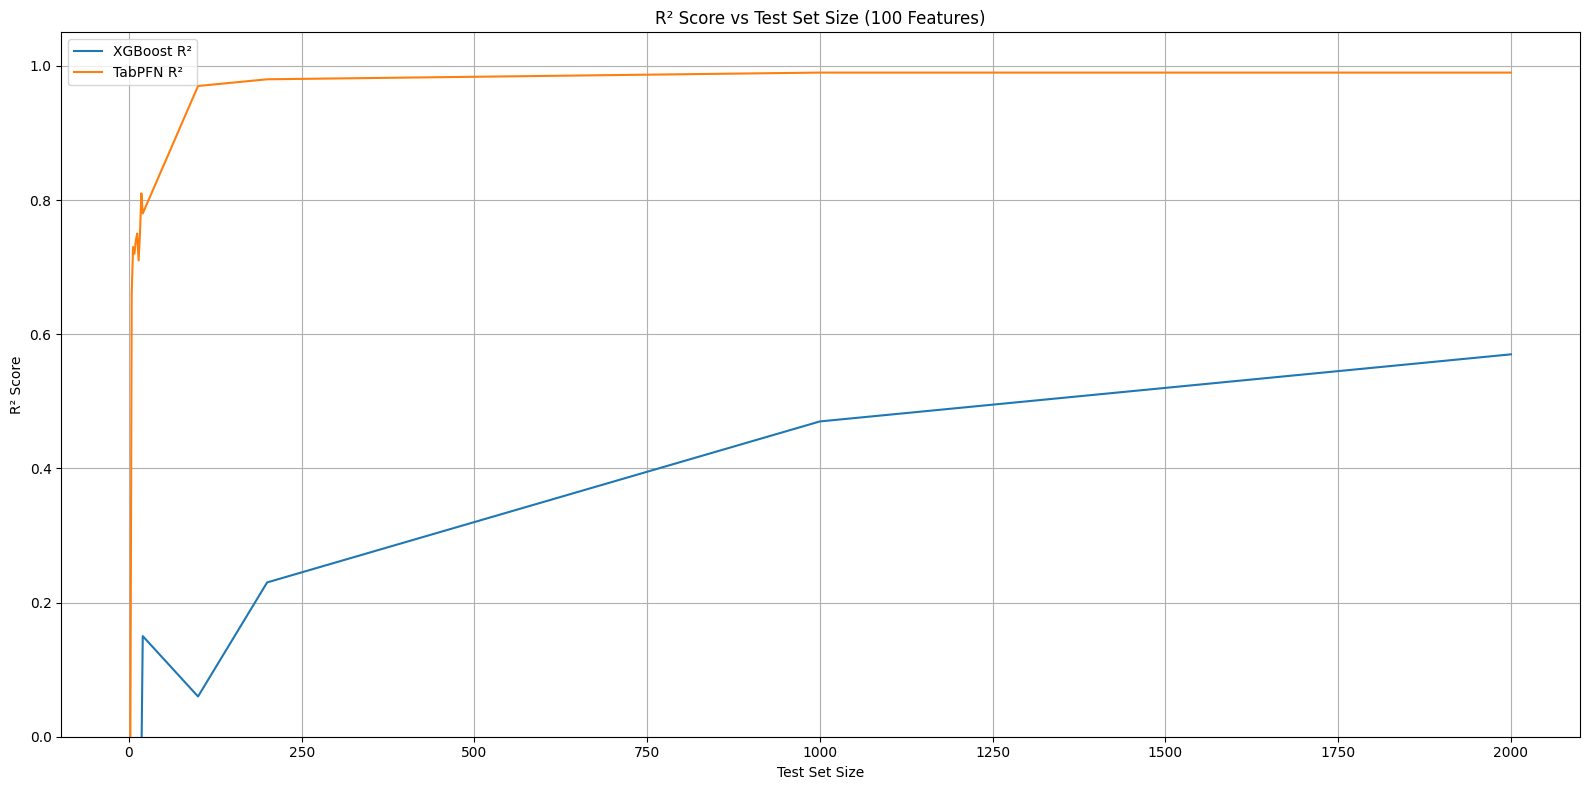

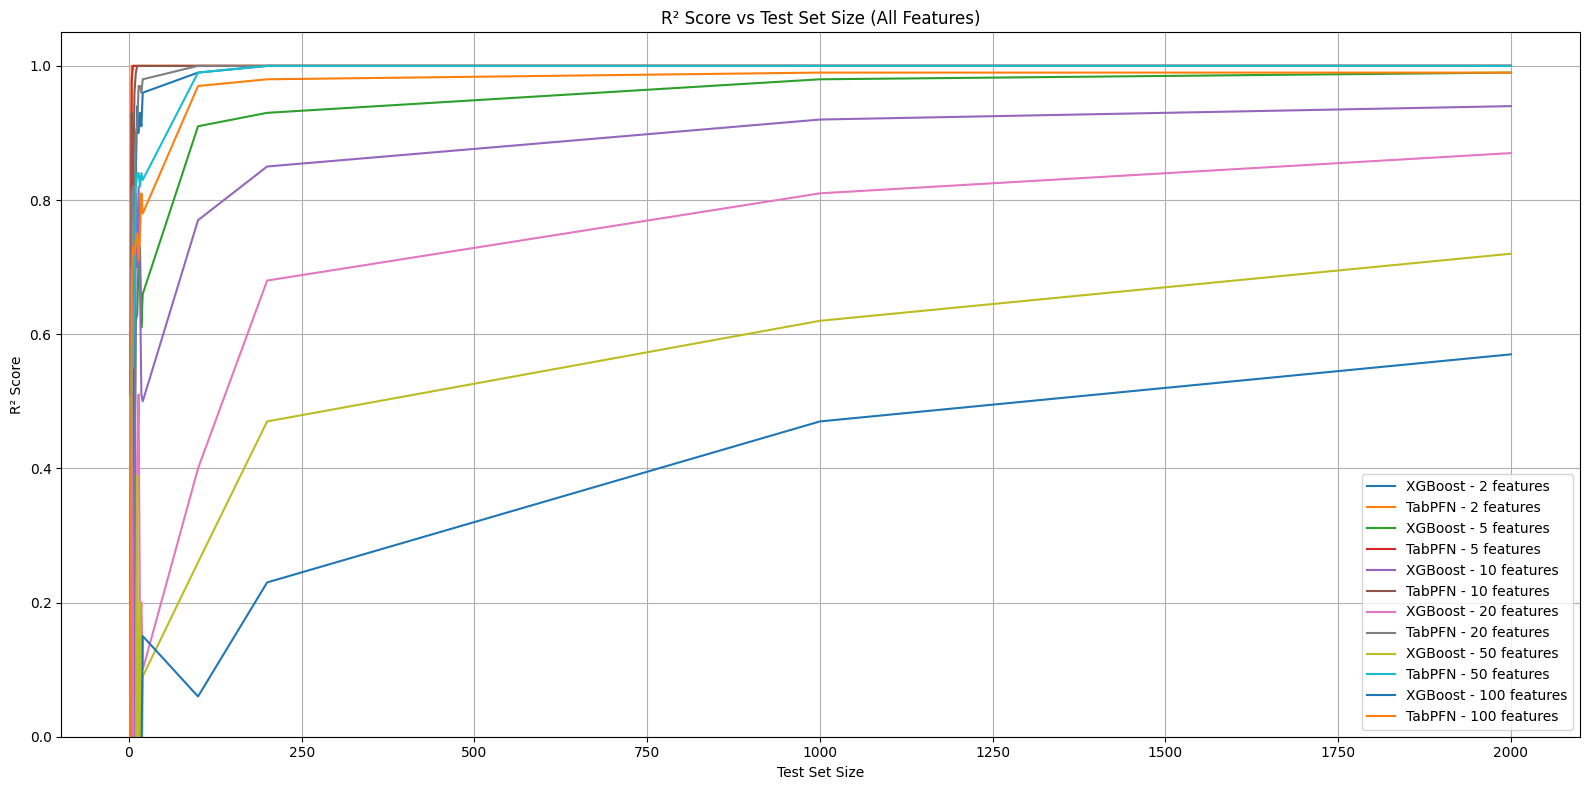

In [4]:
# Plot: Inference Time vs Test Set Size for XGBoost
plt.figure(figsize=(16, 8))
for num_features in feature_counts:
    plt.plot(results[num_features]['xgb']['test_sizes'], results[num_features]['xgb']['inference_time'], label=f'XGBoost - {num_features} features')
plt.xlabel('Test Set Size')
plt.ylabel('Inference Time (seconds)')
plt.title('XGBoost Inference Time vs Test Set Size (for different feature counts)')
plt.legend()
plt.grid(True)
plt.xscale('log')
plt.yscale('log')
plt.tight_layout()
plt.show()

# Plot: Inference Time vs Test Set Size for TabPFN
plt.figure(figsize=(16, 8))
for num_features in feature_counts:
    plt.plot(results[num_features]['tabpfn']['test_sizes'], results[num_features]['tabpfn']['inference_time'], label=f'TabPFN - {num_features} features')
plt.xlabel('Test Set Size')
plt.ylabel('Inference Time (seconds)')
plt.title('TabPFN Inference Time vs Test Set Size (for different feature counts)')
plt.legend()
plt.grid(True)
plt.xscale('log')
plt.yscale('log')
plt.tight_layout()
plt.show()

# Plot: R2 Score vs Test Set Size for both models
for num_features in feature_counts:
    plt.figure(figsize=(16, 8))
    plt.plot(results[num_features]['xgb']['test_sizes'], results[num_features]['xgb']['r2'], label='XGBoost R²')
    plt.plot(results[num_features]['tabpfn']['test_sizes'], results[num_features]['tabpfn']['r2'], label='TabPFN R²')
    plt.xlabel('Test Set Size')
    plt.ylabel('R² Score')
    plt.title(f'R² Score vs Test Set Size ({num_features} Features)')
    plt.legend()
    plt.grid(True)
    plt.ylim(0, 1.05)
    plt.tight_layout()
    plt.show()

# Combined R2 Graph
plt.figure(figsize=(16, 8))
for num_features in feature_counts:
    plt.plot(results[num_features]['xgb']['test_sizes'], results[num_features]['xgb']['r2'], label=f'XGBoost - {num_features} features')
    plt.plot(results[num_features]['tabpfn']['test_sizes'], results[num_features]['tabpfn']['r2'], label=f'TabPFN - {num_features} features')
plt.xlabel('Test Set Size')
plt.ylabel('R² Score')
plt.title('R² Score vs Test Set Size (All Features)')
plt.legend()
plt.grid(True)
plt.ylim(0, 1.05)
plt.tight_layout()
plt.show()
